In [1]:
image_dir = "data/AMD/image_cropped"
mask_path = "/home/rafatmatting/dfm/data/AMD/mask/1-1252426161dfXY_0.jpg"
trimap_path = "/home/rafatmatting/dfm/data/AMD/trimap/1-1252426161dfXY_0.jpg"

In [2]:
from torch.utils.data import Dataset
from datasets.MattingDataset import MattingDataset
from utils.data import Data
import albumentations as A
import torch.nn.functional as F
import torchvision.transforms.functional as T
import torch
from PIL import Image
import numpy

In [9]:
mask_b = Image.open(mask_path).convert("L")
trimap_b = Image.open(trimap_path).convert("L")

mask = numpy.array(mask_b)
trimap = numpy.array(trimap_b)

mask = torch.Tensor(mask)
trimap = torch.Tensor(trimap)

In [21]:
mask.shape

torch.Size([2, 615, 410])

In [11]:
mask1 = mask
mask = torch.stack((mask, trimap))
trimap = torch.stack((trimap, mask1))

In [12]:
trimap.mean()

tensor(134.6299)

In [13]:
mask.mean()

tensor(134.6299)

In [34]:
F.l1_loss(input=trimap, target=mask, reduction="sum")/mask.numel()

tensor(2055.0166)

In [15]:
mse = torch.nn.MSELoss()

In [16]:
mse(trimap, mask)

tensor(2055.0166)

In [28]:
((trimap-mask)**2).mean()

tensor(2055.0166)

In [29]:
((trimap-mask)**2).sum()/(mask.numel())

tensor(2055.0166)

In [31]:
b1 = ((trimap[0]-mask[0])**2).sum()/(mask[0].numel())
b2 = ((trimap[1]-mask[1])**2).sum()/(mask[1].numel())

In [33]:
torch.Tensor([b1,b2]).mean()

tensor(2055.0168)

In [46]:
mask.numel()

252150

In [48]:
mask.shape[0]*mask.shape[1]

252150

In [59]:
data = Data("AMD")
df = data.dataframe()

In [60]:

dataset = MattingDataset(df)

In [61]:
it = next(iter(dataset))

In [70]:
im, mask, trimap , bg, fg = it

In [91]:

import cv2
foreground = cv2.imread(image_path)
background = cv2.imread(trimap_path)
alpha = cv2.imread(mask_path)

foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
alpha = cv2.cvtColor(alpha, cv2.COLOR_BGR2RGB)

# blended = composit(foreground, background, alpha)
# cv2.imwrite("test.png",blended)

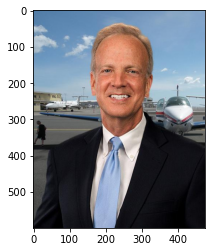

In [92]:
import matplotlib.pyplot as plt

import cv2
# foreground = cv2.imread("puppets.png")
# background = cv2.imread("ocean.png")
# alpha = cv2.imread("puppets_alpha.png")
# foreground = foreground.astype(float)
# background = background.astype(float)
# alpha = alpha.astype(float)/255
# foreground = cv2.multiply(alpha, foreground)
# background = cv2.multiply(1.0 - alpha, background)
# outImage = cv2.add(foreground, background)


plt.imshow(foreground)